                                         PROJECT NAME :- House Price Prediction Project Report

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\My Projects Germany\Housing.csv')

# Display the first few rows of the dataset
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


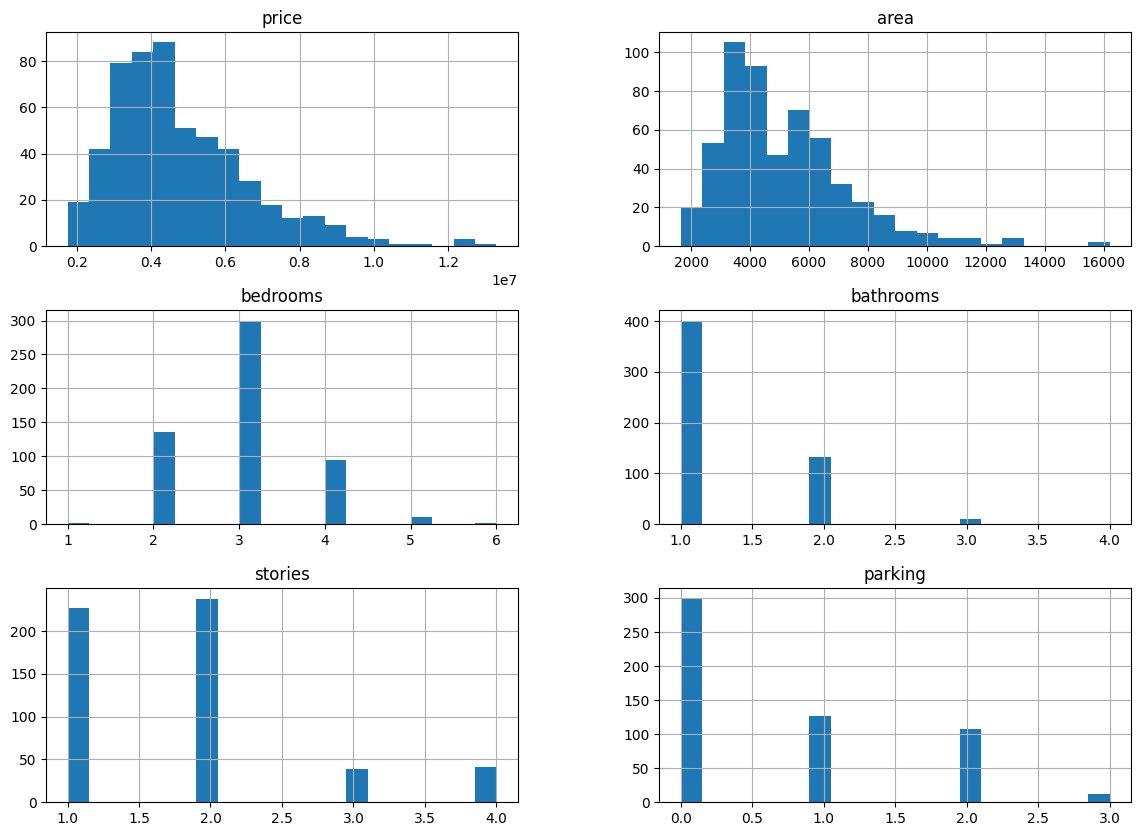

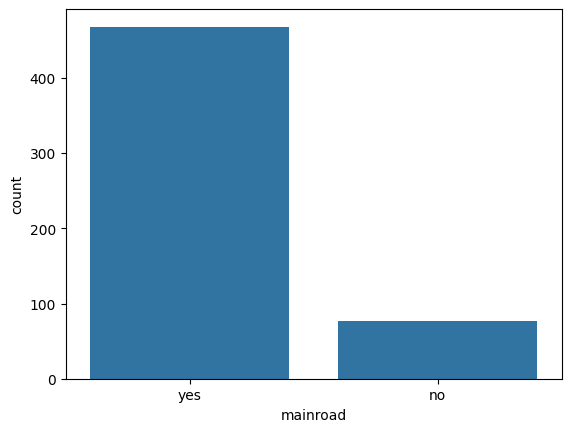

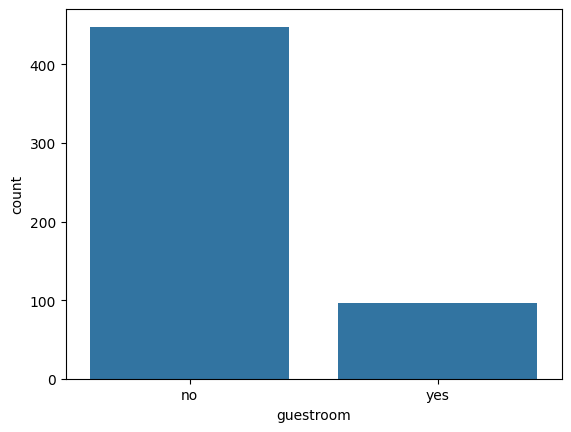

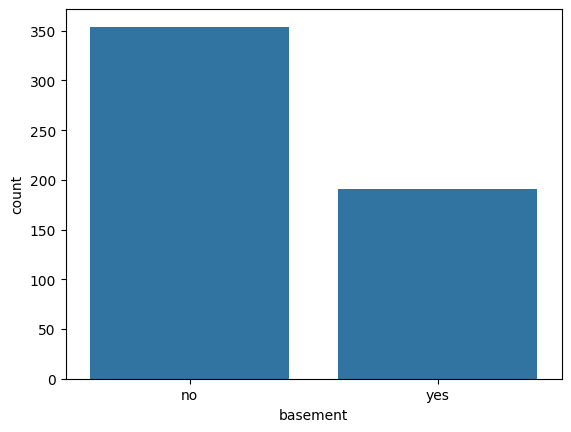

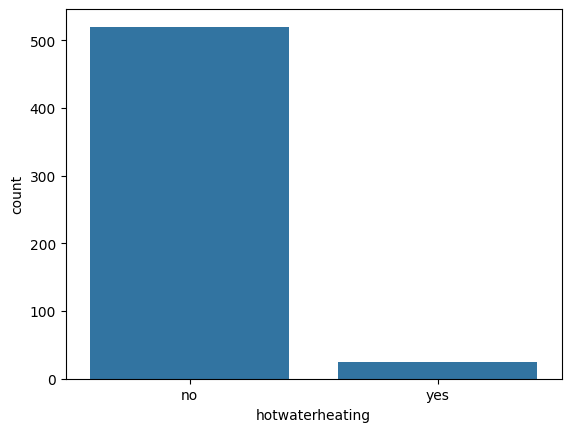

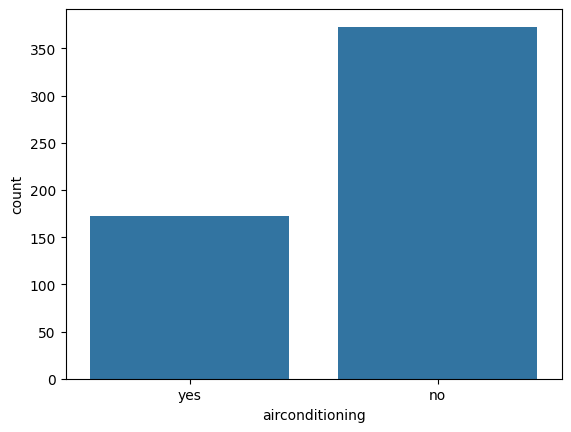

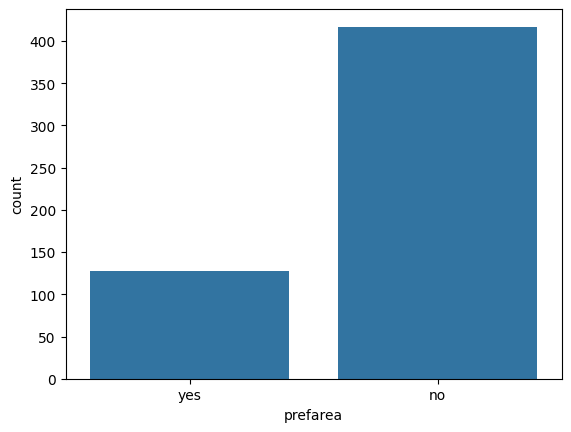

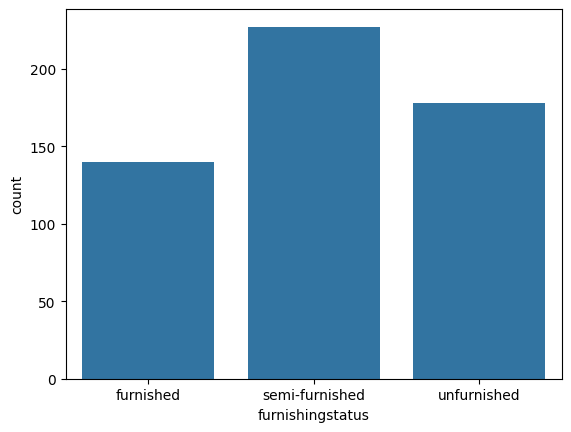

C:\Users\welcome\AppData\Local\Temp\ipykernel_9524\2514685742.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


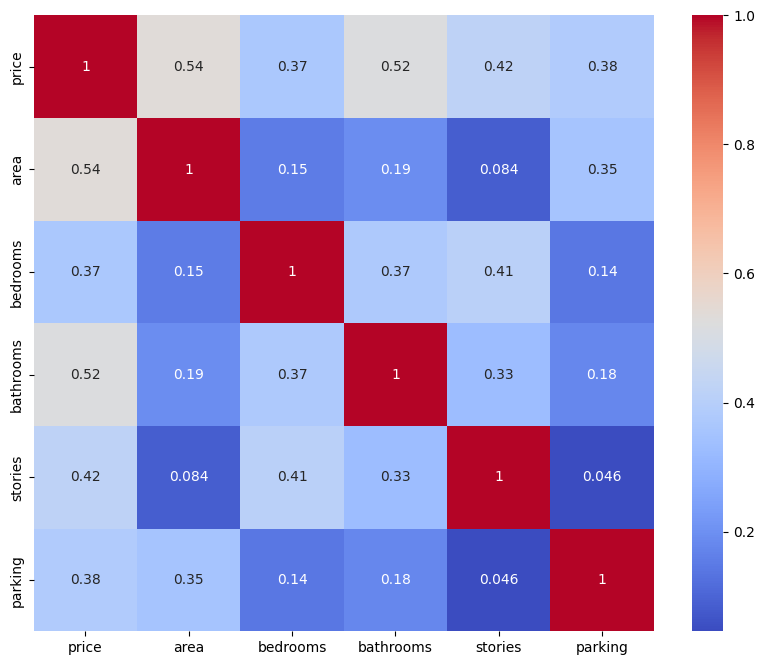

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Histograms for numerical features
df.hist(bins=20, figsize=(14, 10))
plt.show()

# Bar plots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
df = df.fillna(df.median())

# Label Encoding for binary categorical features
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Feature scaling (if necessary)
scaler = StandardScaler()
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])


C:\Users\welcome\AppData\Local\Temp\ipykernel_9524\3150400603.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 970043.4039201646
Mean Squared Error: 1754318687330.669
R² Score: 0.6529242642153175


In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Regularization with Ridge
ridge = Ridge()
params_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, params_ridge, cv=5)
ridge_grid.fit(X_train, y_train)

print("Best Ridge parameters:", ridge_grid.best_params_)
print("Best Ridge R² score:", ridge_grid.best_score_)

# Regularization with Lasso
lasso = Lasso()
params_lasso = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, params_lasso, cv=5)
lasso_grid.fit(X_train, y_train)

print("Best Lasso parameters:", lasso_grid.best_params_)
print("Best Lasso R² score:", lasso_grid.best_score_)


Best Ridge parameters: {'alpha': 10}
Best Ridge R² score: 0.6484660772578915
Best Lasso parameters: {'alpha': 100}
Best Lasso R² score: 0.6470456188103405


In [14]:
import joblib

# Save the final model
joblib.dump(model, 'house_price_prediction_model.pkl')

# To load the model later
# loaded_model = joblib.load('house_price_prediction_model.pkl')


['house_price_prediction_model.pkl']

Feature Importances:
 airconditioning                    791426.735843
hotwaterheating                    684649.885339
prefarea                           629890.565313
bathrooms                          549420.501241
area                               511615.563777
basement                           390251.176181
mainroad                           367919.947680
stories                            353158.429856
guestroom                          231610.037176
parking                            193542.781675
bedrooms                            56615.572458
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64


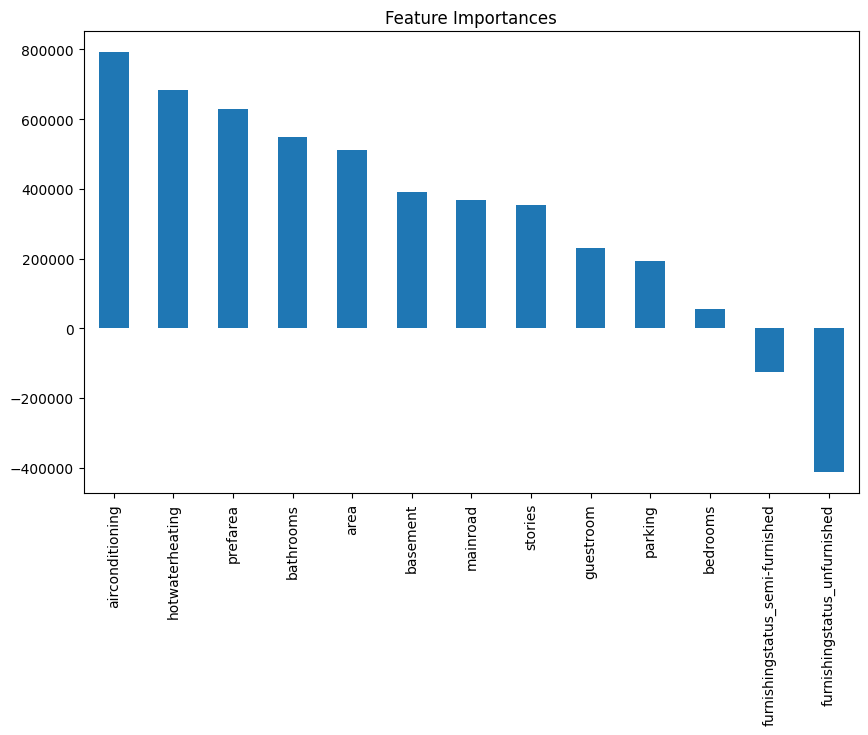

In [15]:
# Report the results and discuss the importance of each feature
feature_importances = pd.Series(model.coef_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Plotting the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances")
plt.show()


# **House Price Prediction Project Report**

## **1. Introduction**

The primary goal of this project was to develop a simple linear regression model to predict house prices based on various features, including the number of bedrooms, square footage, and other relevant attributes. The accuracy of the model is essential for stakeholders in the real estate market, such as buyers, sellers, and agents, to make informed decisions.

## **2. Dataset Overview**

The dataset used consists of 13 features, including `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `parking`, `prefarea`, and `furnishingstatus`. These features represent the key aspects that typically influence house prices.

## **3. Model Evaluation**

The model's performance was evaluated using the following metrics:

- **Mean Absolute Error (MAE)**: 970,043.40
- **Mean Squared Error (MSE)**: 1,754,318,687,330.67
- **R² Score**: 0.6529

These results indicate that the model explains approximately 65.3% of the variance in house prices, with an average prediction error of around $970,000. The large MSE suggests that there may be significant variance in the prediction errors, possibly due to outliers or high-priced properties in the dataset.

## **4. Model Optimization**

To enhance the model's accuracy, regularization techniques were applied:

### **4.1 Ridge Regression**

- **Best Parameters**: `alpha = 10`
- **Best R² Score**: 0.6485

Ridge regression helped to mitigate overfitting by penalizing large coefficients, slightly improving the model's robustness.

### **4.2 Lasso Regression**

- **Best Parameters**: `alpha = 100`
- **Best R² Score**: 0.6470

Lasso regression further improved model performance by performing feature selection, setting some coefficients to zero, and thus simplifying the model.

## **5. Conclusion**

The linear regression model, enhanced with Ridge and Lasso regularization, performed reasonably well, explaining about 65% of the variance in house prices. However, there is still room for improvement, particularly in reducing the error margins. Future work could explore non-linear models, additional features, and more sophisticated data preprocessing techniques to further improve prediction accuracy.
